In [1]:
from google.colab import files #Lectura del archivo
files.upload()

Saving beijing-air-quality.csv to beijing-air-quality.csv


{'beijing-air-quality.csv': b'date, pm25, pm10, o3, no2, so2, co\n2021/6/2, 57, 51, 39, 18, 1, 6\n2021/6/3, 78, 33, 36, 12, , 2\n2021/6/4, 18, , , , , \n2021/5/2, 47, 43, 41, 12, , 1\n2021/5/3, 51, 64, 61, 13, 2, 4\n2021/5/4, 104, 57, 38, 7, , 1\n2021/5/5, 56, 79, 49, 10, , 2\n2021/5/6, 86, 277, 40, 9, 1, 2\n2021/5/7, 168, 129, 40, 5, 1, 2\n2021/5/8, 120, 132, 37, 12, , 1\n2021/5/9, 122, 56, 53, 21, 1, 4\n2021/5/10, 91, 55, 51, 20, 1, 4\n2021/5/11, 81, 44, 72, 14, 1, 6\n2021/5/12, 83, 52, 72, 22, 1, 3\n2021/5/13, 62, 65, 55, 19, 3, 9\n2021/5/14, 146, 60, 43, 14, , 10\n2021/5/15, 115, 36, 30, 9, , 4\n2021/5/16, 45, 27, 38, 9, , 1\n2021/5/17, 16, 47, 49, 19, , 3\n2021/5/18, 54, 64, 58, 21, 1, 5\n2021/5/19, 82, 65, 93, 12, 2, 5\n2021/5/20, 104, 63, 76, 8, 1, 4\n2021/5/21, 115, 64, 101, 11, , 6\n2021/5/22, 113, 69, 107, 13, 1, 5\n2021/5/23, 91, 136, 34, 7, , 1\n2021/5/24, 116, 54, 33, 8, 1, 1\n2021/5/25, 62, 70, 66, 7, 1, 2\n2021/5/26, 67, 63, 47, 15, , 4\n2021/5/27, 63, 52, 36, 16, 1, 4\n

           date  pm25  pm10   o3  no2  so2   co
0      2021/6/2    57    51   39   18    1    6
1      2021/6/3    78    33   36   12         2
2      2021/6/4    18                          
3      2021/5/2    47    43   41   12         1
4      2021/5/3    51    64   61   13    2    4
...         ...   ...   ...  ...  ...  ...  ...
2700   2019/1/1          46   17   20    5    9
2701  2017/9/11          23   35   19    1    3
2702   2015/1/1          67   19   29   16   11
2703   2014/1/1          85   20   30   14   20
2704   2016/1/3               18   32   10   15

[2705 rows x 7 columns]
(2705, 7)
date
 co
<class 'float'>
(2695, 2)
Test MSE: 53.857


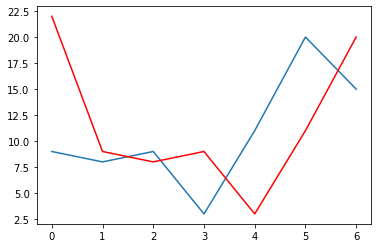

In [12]:
from pandas import read_csv
from pandas import DataFrame
from pandas import concat
from matplotlib import pyplot
from sklearn.metrics import mean_squared_error
import pandas as pd
df = pd.read_csv("beijing-air-quality.csv")
print(df)

print(df.shape) # Tamaño original
df.drop([' pm25',' pm10',   ' o3',  ' no2',  ' so2'], axis=1, inplace=True)
for col in df.columns:
    print(col)

for i in range(len(df[' co'])):
  if df[' co'][i] != ' ':
    df[' co'][i] = float(df[' co'][i])
  else:
    df.drop(i,axis=0,inplace=True)

print(type(df[' co'][16]))
print(df.shape) # Tamaño quitando valores inexistentes

df.head()

df['date'] = pd.to_datetime(df['date'])
ind_df = df.set_index(['date'], drop=True)
ind_df.head()

# create lagged dataset
values = DataFrame(ind_df.values)
dataframe = concat([values.shift(1), values], axis=1)
dataframe.columns = ['t-1', 't+1']
# split into train and test sets
X = dataframe.values
train, test = X[1:len(X)-7], X[len(X)-7:]
train_X, train_y = train[:,0], train[:,1]
test_X, test_y = test[:,0], test[:,1]
 
# persistence model
def model_persistence(x):
	return x
 
# walk-forward validation
predictions = list()
for x in test_X:
	yhat = model_persistence(x)
	predictions.append(yhat)
test_score = mean_squared_error(test_y, predictions)
print('Test MSE: %.3f' % test_score)
# plot predictions vs expected
pyplot.plot(test_y)
pyplot.plot(predictions, color='red')
pyplot.show()

In [27]:
from statsmodels.tsa.ar_model import AutoReg, ar_select_order
X = ind_df.values
train, test = X[1:len(X)-7], X[len(X)-7:]
# train autoregression
model = AutoReg(train, lags=29)
model_fit = model.fit()
print('Coefficients: %s' % model_fit.params)
# make predictions
predictions = model_fit.predict(start=len(train), end=len(train)+len(test)-1, dynamic=False)
for i in range(len(predictions)):
	print('predicted=%f, expected=%f' % (predictions[i], test[i]))
rmse = sqrt(mean_squared_error(test, predictions))
print('Test RMSE: %.3f' % rmse)
# plot results
pyplot.plot(test)
pyplot.plot(predictions, color='red')
pyplot.show()

     |████████████████████████████████| 7.4MB 21.8MB/s 
  Found existing installation: statsmodels 0.12.2
    Uninstalling statsmodels-0.12.2:
      Successfully uninstalled statsmodels-0.12.2


ImportError: ignored